In [1]:
%config Completer.use_jedi = False

### 1. Importing necessary libraries

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### 2. Importing Haar Cascade Classifiers 

In [3]:
eyes_cascade = cv2.CascadeClassifier("./third-party/frontalEyes35x16.xml")
nose_cascade = cv2.CascadeClassifier("./third-party/Nose18x15.xml")
# mouth_cascade = cv2.CascadeClassifier("./third-party/Mouth.xml")

### 3. Reading an Image

In [4]:


img = cv2.imread("./Test/download.jpg", cv2.IMREAD_UNCHANGED)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

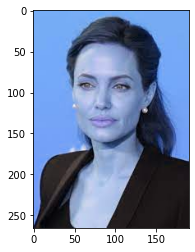

In [5]:
plt.imshow(img)
plt.show()

### 4. Extracting Eyes

2


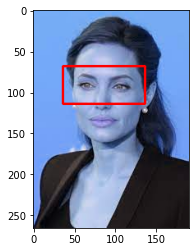

In [6]:
eyes = eyes_cascade.detectMultiScale(img, 1.3, 5)
print(len(eyes))
eyes = sorted(eyes, key = lambda e: e[2] * e[3])
# print(eyes[0:1])
# for x, y, w, h in eyes[0:]:
#     cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

x, y, w, h = eyes[-1]
img1 = img.copy()
cv2.rectangle(img1, (x, y), (x + w, y + h), (255, 0, 0), 2)
plt.imshow(img1)
plt.show()

### 5. Extracting Nose

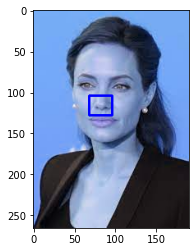

In [7]:
nose = nose_cascade.detectMultiScale(img, 1.3, 5)
nose = sorted(nose, key = lambda n: n[2] * n[3])
# for x1, y1, w1, h1 in nose[-1:]:
#     cv2.rectangle(img, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 255), 2)
x1, y1, w1, h1 = nose[-1]
# print(x1, y1, w1, h1)
img1 = img.copy()
cv2.rectangle(img1, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 255), 2)
plt.imshow(img1)
plt.show()

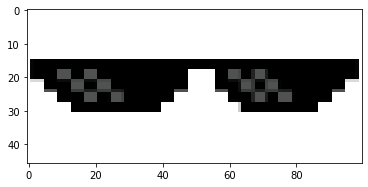

In [8]:
glasses = cv2.imread("./Train/glasses.png", cv2.IMREAD_UNCHANGED)
# glasses = cv2.cvtColor(glasses, cv2.COLOR_BGR2RGB)
glasses = cv2.resize(glasses, (w, h))
plt.imshow(glasses)
plt.show()

(24, 28, 4)


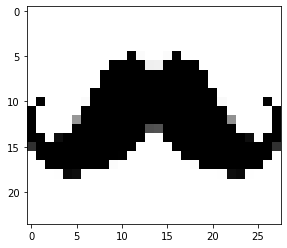

In [9]:
mustache = cv2.imread("./Train/mustache.png", cv2.IMREAD_UNCHANGED)
# glasses = cv2.cvtColor(glasses, cv2.COLOR_BGR2RGB)
mustache = cv2.resize(mustache, (w1, h1))
print(mustache.shape)
plt.imshow(mustache)
plt.show()

### 6. Blending Glass and Mustache over Image

In [10]:
def blend_transparent(face_img, overlay_t_img):
    # Split out the transparency mask from the colour info
    overlay_img = overlay_t_img[:,:,:3] # Grab the BRG planes
    overlay_mask = overlay_t_img[:,:,3:]  # And the alpha plane
#     plt.imshow(overlay_mask)
#     plt.show()
    # Again calculate the inverse mask
    background_mask = 255 - overlay_mask
#     plt.imshow(background_mask)
#     plt.show()
    # Turn the masks into three channel, so we can use them as weights
    overlay_mask = cv2.cvtColor(overlay_mask, cv2.COLOR_GRAY2BGR)
    background_mask = cv2.cvtColor(background_mask, cv2.COLOR_GRAY2BGR)
#     plt.imshow(overlay_mask)
#     plt.show()
#     plt.imshow(background_mask)
#     plt.show()

    # Create a masked out face image, and masked out overlay
    # We convert the images to floating point in range 0.0 - 1.0
    face_part = (face_img * (1 / 255.0)) * (background_mask * (1 / 255.0))
#     plt.imshow(face_part)
#     plt.show()
    overlay_part = (overlay_img * (1 / 255.0)) * (overlay_mask * (1 / 255.0))
#     plt.imshow(overlay_part)
#     plt.show()
    # And finally just add them together, and rescale it back to an 8bit integer image    
    return np.uint8(cv2.addWeighted(face_part, 255.0, overlay_part, 255.0, 0.0))

In [11]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

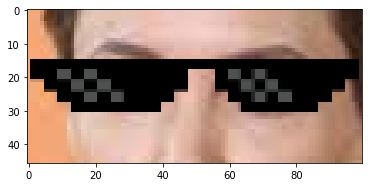

In [12]:
face_glass = blend_transparent(img[y : y + h, x : x + w], glasses)
plt.imshow(face_glass)
plt.show()

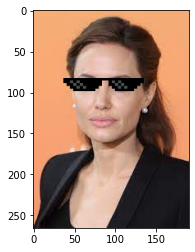

In [13]:
img[y: y + h, x : x + w] = face_glass
plt.imshow(img)
plt.show()

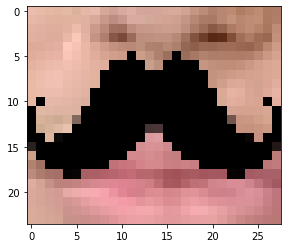

In [14]:
mustache_blend = blend_transparent(img[y1 + int(h1/2) : y1 + int(h1/2) + h1, x1 : x1 + w1], mustache)
plt.imshow(mustache_blend)
plt.show()

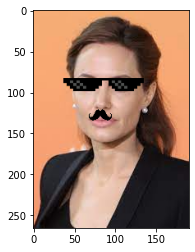

In [15]:
img[y1 + int(h1/2) : y1 + int(h1/2) + h1, x1 : x1 + w1] = mustache_blend
plt.imshow(img)
plt.show()

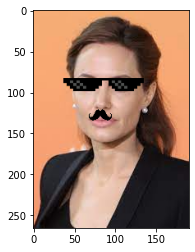

In [16]:
plt.imshow(img)
plt.show()